<a href="https://colab.research.google.com/github/kimujinu/Machine-learning/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 학습

## 단순한 신경망 구현 : Logic Gate

### 필요한 모듈 import

In [1]:
import numpy as np
import matplotlib .pyplot as plt
plt.style.use(['seaborn-whitegrid'])

### 하이퍼 파라미터(Hyper Parameter)

In [2]:
epochs = 1000
lr = 0.1

### 유틸 함수들(Util Functions)

In [4]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def mean_squared_error(pred_y,true_y):
  return 0.5 * (np.sum((true_y - pred_y)**2))

def cross_entropy_error(pred_y,true_y):
  if true_y.ndim==1:
    true_y = true_y.reshape(1,-1)
    pred_y = pred_y.reshape(1,-1)
  
  delta = 1e-7
  return -np.sum(true_y + np.log(pred_y + delta))

def cross_entropy_error_for_batch(pred_y,true_y):
  if true_y.ndim==1:
    true_y = true_y.reshape(1,-1)
    pred_y = pred_y.reshape(1,-1)
  
  delta = 1e-7
  batch_size = pred_y.shape[0]
  return -np.sum(true_y + np.log(pred_y + delta))

def cross_entropy_error_for_bin(pred_y,true_y):
  return 0.5 * np.sum((-true_y * np.log(pred_y) - (1-true_y) * np.log(1-pred_y)))

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

def differential(f,x):
  eps = 1e-5
  diff_value = np.zeros_like(x)

  for i in range(x.shape[0]):
    temp_val = x[i]
    x[i] = temp_val + eps
    f_h1 = f(x)

    x[i] = temp_val - eps
    f_h2 = f(x)

    diff_value[i] = (f_h1-f_h2) / (2*eps)
    x[i] = temp_val

  return diff_value

### 신경망

In [7]:
class LogicGateNet():

  def __init__(self):
    def weight_init():
      np.random.seed(1)
      weights = np.random.randn(2)
      bias = np.random.rand(1)

      return weights,bias
    
    self.weights, self.bias = weight_init()
  
  def predict(self,x):
    W = self.weights.reshape(-1,1)
    b = self.bias

    pred_y = sigmoid(np.dot(x,W)+b)
    return pred_y

  def loss(self,x,true_y):
    pred_y = self.predict(x)
    return cross_entropy_error_for_bin(pred_y,true_y)
  
  def get_gradient(self,x,t):
    def loss_grad(grad):
      return self.loss(x,t)
    
    grad_W = differential(loss_grad,self.weights)
    grad_B = differential(loss_grad,self.bias)

    return grad_W,grad_B


### AND Gate

#### 모델 생성 및 학습

In [8]:
AND = LogicGateNet()

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[0],[0],[1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = AND.get_gradient(X,Y)

  AND.weights -= lr * grad_W
  AND.bias -= lr * grad_B

  loss = AND.loss(X,Y)
  train_loss_list.append(loss)

  if i%100 == 99:
    print("Epoch : {}, Cost : {}, weights : {}, Bias : {}".format(i+1,loss,AND.weights,AND.bias))

Epoch : 100, Cost : 0.6886489498077508, weights : [1.56426876 0.79168393], Bias : [-2.14871589]
Epoch : 200, Cost : 0.4946368603067626, weights : [2.01360719 1.71241131], Bias : [-3.07894028]
Epoch : 300, Cost : 0.3920165980751678, weights : [2.42841657 2.29753793], Bias : [-3.79103207]
Epoch : 400, Cost : 0.3257214374794629, weights : [2.794852   2.73235738], Bias : [-4.37257095]
Epoch : 500, Cost : 0.2786360133470194, weights : [3.11636193 3.08408364], Bias : [-4.86571237]
Epoch : 600, Cost : 0.24328504683857205, weights : [3.40015395 3.38235762], Bias : [-5.29433736]
Epoch : 700, Cost : 0.2157253655246455, weights : [3.65300561 3.64264217], Bias : [-5.67349792]
Epoch : 800, Cost : 0.19363244428376314, weights : [3.88044124 3.87412053], Bias : [-6.01340133]
Epoch : 900, Cost : 0.175532131279099, weights : [4.08680123 4.08279091], Bias : [-6.32133891]
Epoch : 1000, Cost : 0.16043926933305935, weights : [4.27548114 4.27284863], Bias : [-6.6027234]


#### 테스트

In [9]:
print(AND.predict(X))

[[0.00135483]
 [0.08867878]
 [0.08889176]
 [0.87496677]]


### OR Gate

#### 모델 생성 및 학습

In [10]:
OR = LogicGateNet()
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_2 = np.array([[0],[1],[1],[1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = OR.get_gradient(X,Y_2)

  OR.weights -= lr * grad_W
  OR.bias -= lr * grad_B

  loss = OR.loss(X,Y_2)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch : {}, Cost : {}, weights : {}, Bias : {}".format(i+1,loss,OR.weights,OR.bias))

Epoch : 100, Cost : 0.49580923848037245, weights : [2.45484353 1.40566594], Bias : [-0.14439625]
Epoch : 200, Cost : 0.3398674231512476, weights : [2.98631846 2.39448393], Bias : [-0.67661178]
Epoch : 300, Cost : 0.2573360986184237, weights : [3.45016595 3.08431266], Bias : [-1.03721585]
Epoch : 400, Cost : 0.20630142190061632, weights : [3.85230067 3.60865952], Bias : [-1.30598633]
Epoch : 500, Cost : 0.1716549922114765, weights : [4.20195872 4.03000824], Bias : [-1.52060015]
Epoch : 600, Cost : 0.14665018845489367, weights : [4.50867681 4.38171478], Bias : [-1.6994397]
Epoch : 700, Cost : 0.12779768649443757, weights : [4.78049264 4.68334611], Bias : [-1.8527641]
Epoch : 800, Cost : 0.11310517185394649, weights : [5.0237707 4.9472786], Bias : [-1.98691756]
Epoch : 900, Cost : 0.10135180918369109, weights : [5.24347159 5.18181684], Bias : [-2.10611973]
Epoch : 1000, Cost : 0.09174843008614507, weights : [5.44346811 5.39279833], Bias : [-2.21332947]


#### 테스트

In [11]:
print(OR.predict(X))

[[0.09855987]
 [0.9600543 ]
 [0.96195283]
 [0.9998201 ]]


### NAND Gate

#### 모델 생성 및 학습

In [12]:
NAND = LogicGateNet()
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_2 = np.array([[1],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = NAND.get_gradient(X,Y_2)

  NAND.weights -= lr * grad_W
  NAND.bias -= lr * grad_B

  loss = NAND.loss(X,Y_2)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch : {}, Cost : {}, weights : {}, Bias : {}".format(i+1,loss,NAND.weights,NAND.bias))

Epoch : 100, Cost : 0.7911738653764443, weights : [-0.48972722 -1.25798774], Bias : [1.74566135]
Epoch : 200, Cost : 0.5430490957875922, weights : [-1.51545093 -1.80261804], Bias : [2.79151756]
Epoch : 300, Cost : 0.42125913027366896, weights : [-2.14614496 -2.26642639], Bias : [3.56506179]
Epoch : 400, Cost : 0.3456117101528016, weights : [-2.607325   -2.66303355], Bias : [4.18521187]
Epoch : 500, Cost : 0.293129860518541, weights : [-2.97696333 -3.00501941], Bias : [4.70528682]
Epoch : 600, Cost : 0.2543396786003746, weights : [-3.28850585 -3.30365261], Bias : [5.1539571]
Epoch : 700, Cost : 0.22443918596780807, weights : [-3.55912171 -3.56778782], Bias : [5.54869527]
Epoch : 800, Cost : 0.20067626330797955, weights : [-3.7989077  -3.80411461], Bias : [5.90108417]
Epoch : 900, Cost : 0.1813412551760061, weights : [-4.01441395 -4.01767547], Bias : [6.21926514]
Epoch : 1000, Cost : 0.16530944081725432, weights : [-4.21019696 -4.21231432], Bias : [6.50920952]


#### 테스트

In [13]:
print(NAND.predict(X))

[[0.99851256]
 [0.90861957]
 [0.90879523]
 [0.12861037]]


### XOR Gate

#### 모델 생성 및 학습

In [21]:
XOR = LogicGateNet()
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_2 = np.array([[0],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = XOR.get_gradient(X,Y_2)

  XOR.weights -= lr * grad_W
  XOR.bias -= lr * grad_B

  loss = XOR.loss(X,Y_2)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch : {}, Cost : {}, weights : {}, Bias : {}".format(i+1,loss,XOR.weights,XOR.bias))

Epoch : 100, Cost : 1.402685224545991, weights : [ 0.47012771 -0.19931523], Bias : [-0.16097708]
Epoch : 200, Cost : 1.3879445622846385, weights : [ 0.1572739  -0.03387161], Bias : [-0.07321056]
Epoch : 300, Cost : 1.386492030048373, weights : [0.05525161 0.00089673], Bias : [-0.03330094]
Epoch : 400, Cost : 1.3863236205351996, weights : [0.02049628 0.00504503], Bias : [-0.01514784]
Epoch : 500, Cost : 1.386299474364679, weights : [0.0080051  0.00361297], Bias : [-0.00689034]
Epoch : 600, Cost : 1.3862953430687444, weights : [0.00326661 0.00201812], Bias : [-0.00313421]
Epoch : 700, Cost : 1.3862945581495083, weights : [0.00137938 0.00102449], Bias : [-0.00142566]
Epoch : 800, Cost : 1.38629440139037, weights : [0.00059716 0.00049628], Bias : [-0.00064849]
Epoch : 900, Cost : 1.3862943694120307, weights : [0.00026303 0.00023435], Bias : [-0.00029498]
Epoch : 1000, Cost : 1.386294362832352, weights : [0.0001172  0.00010905], Bias : [-0.00013418]


#### 테스트

In [22]:
print(XOR.predict(X))

[[0.49996646]
 [0.49999372]
 [0.49999575]
 [0.50002302]]


#### 2층 신경망으로 XOR 게이트 구현(1)

- 얕은 신경망, Shallow Neural Network

- 두 논리게이트(NAND, OR)를 통과하고  
  AND 게이트로 합쳐서 구현

- 06 신경망 구조 참고

In [23]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_5 = np.array([[0],[1],[1],[0]])

s1 = NAND.predict(X)
s2 = OR.predict(X)
X_2 = np.array([s1,s2]).T.reshape(-1,2)

#### 테스트

In [24]:
print(AND.predict(X_2))

[[0.12870357]
 [0.79966936]
 [0.80108545]
 [0.14420781]]


#### 2층 신경망으로 XOR 게이트 구현(2)
- 클래스로 구현

In [40]:
class XORNet():

  def __init__(self):
    np.random.seed(1)

    def weight_init():
      params = {}
      params['w_1'] = np.random.randn(2)
      params['b_1'] = np.random.rand(2)
      params['w_2'] = np.random.randn(2)
      params['b_2'] = np.random.rand(1)

      return params
    
    self.params = weight_init()
  
  def predict(self,x):
    W_1,W_2 = self.params['w_1'].reshape(-1,1), self.params['w_2'].reshape(-1,1)
    B_1,B_2 = self.params['b_1'], self.params['b_2']

    A1 = np.dot(x,W_1) + B_1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1,W_2) + B_2
    pred_y = sigmoid(A2)

    return pred_y

  def loss(self,x,true_y):
    pred_y = self.predict(x)
    return cross_entropy_error_for_bin(pred_y,true_y)

  def get_gradient(self,x,t):

    def loss_grad(grad):
      return self.loss(x,t)

    grads = {}
    grads['w_1'] = differential(loss_grad,self.params['w_1'])
    grads['b_1'] = differential(loss_grad,self.params['b_1'])
    grads['w_2'] = differential(loss_grad,self.params['w_2'])
    grads['b_2'] = differential(loss_grad,self.params['b_2'])

    return grads

#### 하이퍼 파라미터(Hyper Parameter)
- 재조정

In [27]:
lr = 0.3

#### 모델 생성 및 학습

In [42]:
XOR = XORNet()
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_5 = np.array([[0],[1],[1],[0]])

train_loss_list = list()

for i in range(epochs):
  grads = XOR.get_gradient(X,Y_5)

  for key in ('w_1','b_1','w_2','b_2'):
    XOR.params[key] -= lr * grads[key]

  loss = XOR.loss(X,Y_5)
  train_loss_list.append(loss)

  if i%100 == 99:
    print("Epoch :{}, Cost: {}".format(i+1,loss))

Epoch :100, Cost: 1.353561444245376
Epoch :200, Cost: 1.2827154568291983
Epoch :300, Cost: 0.8968907892231803
Epoch :400, Cost: 0.338719714121707
Epoch :500, Cost: 0.18121344476204979
Epoch :600, Cost: 0.11991186457349581
Epoch :700, Cost: 0.08861936864730534
Epoch :800, Cost: 0.0699218065308316
Epoch :900, Cost: 0.05758041353096763
Epoch :1000, Cost: 0.0488609356844432


#### 테스트

In [43]:
print(XOR.predict(X))

[[0.0217367 ]
 [0.96884394]
 [0.97816819]
 [0.0217794 ]]


## 다중 클래스 분류 : MNIST Dataset

### 배치 처리
- 학습 데이터 전체를 한번에 진행하지 않고  
  일부 데이터(샘플)을 확률적으로 구해서 조금씩 나누어 진행

- 확률적 경사 하강법(Stochastic Gradient Descent) 또는  
  미니 배치 학습법(mini-batch learning)이라고도 부름

#### 신경망 구현 : MNIST 

#### 필요한 모듈 임포트

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tqdm.notebook import tqdm

#### 데이터 로드

In [47]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test,y_test) = mnist.load_data()

#### 데이터 확인

In [48]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000, 28, 28)


(28, 28)


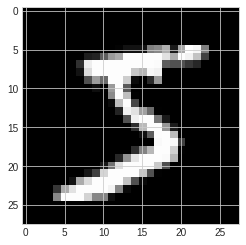

In [49]:
img = x_train[0]
print(img.shape)

plt.imshow(img,cmap='gray')
plt.show()

In [50]:
y_train[0]

5

#### 데이터 전처리 (Data Preprocessing)

In [53]:
def flatten_for_mnist(x):
  temp = np.zeros((x.shape[0],x[0].size))

  for idx,data in enumerate(x):
    temp[idx,:] = data.flatten()

  return temp

In [56]:
x_train, x_test = x_train / 255.0 , x_test/255.0

x_train = flatten_for_mnist(x_train)
x_test = flatten_for_mnist(x_test)

print(x_train.shape)
print(x_test.shape)

y_train_ohe = tf.one_hot(y_train,depth=10).numpy()
y_test_ohe = tf.one_hot(y_test,depth=10).numpy()

print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [59]:
print(x_train[0].max(),x_train[0].min())
print(y_train_ohe[0])

6.030862941101084e-08 0.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 하이퍼 파라미터(Hyper Parameter)

In [67]:
epochs = 2
lr = 0.1
batch_size = 100
train_size = x_train.shape[0]

#### 사용되는 함수들(Util Functions)

In [68]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def mean_squared_error(pred_y,true_y):
  return 0.5 * (np.sum((true_y - pred_y)**2))

def cross_entropy_error(pred_y,true_y):
  if true_y.ndim==1:
    true_y = true_y.reshape(1,-1)
    pred_y = pred_y.reshape(1,-1)
  
  delta = 1e-7
  return -np.sum(true_y + np.log(pred_y + delta))

def cross_entropy_error_for_batch(pred_y,true_y):
  if true_y.ndim==1:
    true_y = true_y.reshape(1,-1)
    pred_y = pred_y.reshape(1,-1)
  
  delta = 1e-7
  batch_size = pred_y.shape[0]
  return -np.sum(true_y + np.log(pred_y + delta))

def cross_entropy_error_for_bin(pred_y,true_y):
  return 0.5 * np.sum((-true_y * np.log(pred_y) - (1-true_y) * np.log(1-pred_y)))

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

def differential_1d(f,x):#1차원 일때
  
  eps = 1e-5
  diff_value = np.zeros_like(x)

  for i in range(x.shape[0]):
    temp_val = x[i]

    x[i] = temp_val + eps
    f_h1 = f(x)

    x[i] = temp_val - eps
    f_h2 = f(x)

    diff_value[i] = (f_h1-f_h2) / (2*eps)
    x[i] = temp_val

  return diff_value

def differential_2d(f,X):
  if X.ndim == 1:
    return differential_1d(f,X)
  else:
    grad  = np.zeros_like(X)

    for idx, x in enumerate(X):
      grad[idx] = differential_1d(f,x)
    
    return grad

#### 2층 신경망으로 구현

In [69]:
class MyModel():

  def __init__(self):

    def weight_init(input_nodes,hidden_nodes,output_units):
      np.random.seed(777)

      params = {}
      params['w_1'] = 0.01 * np.random.randn(input_nodes,hidden_nodes)
      params['b_1'] = np.zeros(hidden_nodes)
      params['w_2'] = 0.01 * np.random.randn(hidden_nodes,output_units)
      params['b_2'] = np.zeros(output_units)

      return params
    
    self.params = weight_init(784,64,10)
  
  def predict(self,x):
    W_1,W_2 = self.params['w_1'], self.params['w_2']
    B_1,B_2 = self.params['b_1'], self.params['b_2']

    A1 = np.dot(x,W_1) + B_1
    Z1 = sigmoid(A1)

    A2 = np.dot(Z1,W_2) + B_2
    pred_y = softmax(A2)

    return pred_y

  def loss(self,x,true_y):
    pred_y = self.predict(x)
    return cross_entropy_error_for_bin(pred_y,true_y)
  
  def accuracy(self,x,true_y):
    pred_y = self.predict(x)
    y_argmax = np.argmax(pred_y,axis=1)
    t_argmax = np.argmax(true_y,axis=1)

    accuracy = np.sum(y_argmax == t_argmax) / float(x.shape[0])

    return accuracy

  def get_gradient(self,x,t):

    def loss_grad(grad):
      return self.loss(x,t)

    grads = {}
    grads['w_1'] = differential_2d(loss_grad,self.params['w_1'])
    grads['b_1'] = differential_2d(loss_grad,self.params['b_1'])
    grads['w_2'] = differential_2d(loss_grad,self.params['w_2'])
    grads['b_2'] = differential_2d(loss_grad,self.params['b_2'])

    return grads

#### 모델 생성 및 학습
- 시간 많이 소요

In [71]:
model = MyModel()

train_loss_list = list()
train_acc_list = list()
test_acc_list = list()
iter_per_epoch = max(train_size / batch_size,1)

start_time = time.time()
for i in tqdm(range(epochs)):

  batch_idx = np.random.choice(train_size,batch_size)
  x_batch = x_train[batch_idx]
  y_batch = y_train_ohe[batch_idx]

  grads = model.get_gradient(x_batch,y_batch)

  for key in grads.keys():
    model.params[key] -= lr * grads[key]

  loss = model.loss(x_batch,y_batch)
  train_loss_list.append(loss)
  
  train_accuracy = model.accuracy(x_train,y_train_ohe)
  test_accuracy = model.accuracy(x_test,y_test_ohe)
  train_acc_list.append(train_accuracy)
  test_acc_list.append(test_accuracy)

  print("Epoch : {}, Cost: {}, Train Accuracy : {} , Test Accuracy : {}".format(i+1,loss,train_accuracy,test_accuracy))

end_time = time.time()

print("총 학습 소요시간 :{}".format(end_time - start_time))

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch : 1, Cost: 467.1932925134994, Train Accuracy : 0.10441666666666667 , Test Accuracy : 0.1028
Epoch : 2, Cost: 752.8216566431992, Train Accuracy : 0.09751666666666667 , Test Accuracy : 0.0974
총 학습 소요시간 :200.62235498428345


### 모델의 결과
- 모델은 학습이 잘 될 수도, 잘 안될 수도 있음

- 만약, 학습이 잘 되지 않았다면,  
  학습이 잘 되기 위해서 어떠한 조치를 취해야 하는가?
  - 다양한 학습관련 기술이 존재